------
## CUSTOMER CHURN

Simply put, when a customer stops being a customer, we say the customer has **churned**. Note that this definition isn't particularly precise: What does it mean to say that a customer stopped being a customer? 

**Churn rate** is the percentage of customers that churned in a given time period.

$$
\frac{\text{Number of Churned Customers}}{\text{Number of Total Customers}}
$$


Scenario: You purchased your local gym from its previous owners. It was a great deal as their mismanagement led the owners to decide that the business wasn't profitable; you as a customer and entrepreneur were able to see the unfulfilled potential.

In January of 2013, the transaction was complete and you immediately took the opportunity to make a New Year's Resolution promo where people could sign up for the whole year and pay \\$500 instead of \\$50 per month. You also renamed the gym as *Muscle Labs* — not only are you fit, you also are a creative genius.

You decided to use the traditional subscription model used in gyms where customers pay an installment per month to access the gym. A customer churns when they elect not to pay the installment — this makes our life easier in implementing the concept for churn.

#### Import dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import datetime as dt
from datetime import timedelta
from datetime import date
from calendar import monthrange

The dataset consists of fictitious data and is stored in the file `muscle_labs_dataset.csv`. Here are the first few rows:


In [2]:
subs = pd.read_csv('inputData/muscle_labs_dataset.csv', parse_dates= ['end_date','start_date'])
subs.head()

,id,customer_id,end_date,start_date,subscription_period,price
0,5,1337,2014-12-28 01:40:57,2014-10-25 12:39:18,monthly,50
1,28,1338,2014-11-19 01:48:05,2014-10-17 13:47:59,monthly,50
2,44,1339,2014-11-01 20:56:37,2014-10-30 05:50:54,annual,500
3,85,1340,2014-12-09 02:51:57,2013-12-05 14:51:57,annual,500
4,168,1341,2015-11-16 09:19:29,2014-11-13 20:19:23,annual,500


Here's the data dictionary:

- `id`: The subscription ID; a customer can appear multiple times in this dataset by virtue of having multiple subscriptions instead of a continuous one
- `customer_id`: The customer's ID
- `end_date`: The actual (if in the past) or estimated (if in the future) end date of the subscription
- `start_date`: The subscription start date
- `subscription_period`: Specifies whether it is a monthly or annual subscription
- `price`: The price

It is now December 2014, and you decide to put your knowledge to use and track the monthly churn rate from before you owned the gym up to last month (November 2014).


<iframe style="box-sizing: inherit; height: 711px; width: 523.391px; border: none; background: transparent; position: absolute; z-index: -1; top: 0px; left: 0px;"></iframe>

Create dataset that tracks the number of churned customers per month.

1. Read in the dataset into a dataframe called `subs`.

   - Use the `parse_dates` argument in `pd.read_csv` to parse the dates appropriately.

2. Create an integer column in `subs` called `churn_month` that is the `end_date` column in `yyyymm` format.

3. Find the number of churned customers per month:

   - Group by `churn_month` and count the number of rows.
   - Assign this data to a dataframe called `monthly_churn`.
   - The (only) column should be named `total_churned`.


**NOTE (Date Wrangling)**
Note that because of the way we created `monthly_churn`, it can only contain months in which customers have churned — it could potentially be missing a few months. 

Inspect the `start_date` column in `subs` to figure out what is the earliest month we have data in.

In [3]:
subs = pd.read_csv('inputData/muscle_labs_dataset.csv', parse_dates= ['end_date','start_date'])


print(subs["start_date"].min())

2011-01-05 13:55:00


The data in monthly_churn starts at March 2011. Given the above result, we conclude that we're missing at least two months.
Create a dataframe with a column that accounts for all the relevant months.

Let's now populate this dataframe with the data in monthly_churn.


1. Use the `pandas.merge()` function to populate `churn` with the data already present in `monthly_churn` :
   - The dataframe on the left should be `churn`.
   - The dataframe on the right should be `monthly_churn`.
   - In order not to lose any months, use a `left` kind of merge.

2. Display `churn.head()`; note that it has some expected missing values.


3. Use the `DataFrame.fillna()` method to input `0` inplace of missing values.

4. Change the `total_churned` column to an integer format.

------
**TOTAL CUSTOMERS (DENOMINATOR IN CHURN RATE FORMULA)**
The number of customers can change throughout the month. Potentially even everyday, and depending on implementation details, it can change from one minute to the other. So how do we decide on the denominator? The following is a non-exhaustive list of several common options:

- The number of customers at the beginning of the time period.
- The mean between the number of customers at the beginning of the time period and at the end of the same period.
- The average throughout the time period — for example, if the chosen time frame is a week, sum the number of customers from Monday through Sunday and divide by seven.

Each definition has its pros and cons and what definition to use is something that depends on the details of the product and the business. Having said this, it's better to use any reasonable definition than be stuck on choosing the absolute best one and not move on with getting this metric.

In this scenario we'll use the the first definition: The number of churned customers divided by the number of customers at the beginning of the time period. Its simplicity bring us a couple of important advantages:

- It's easy to understand
- It's easy to drill down into

In the following exercise our strategy will be based on determining the number of customers at the beginning of the month. This is equivalent to finding the number of customers at the end of the previous month — we'll do the latter.

More concretely, given a month `ym` (from `yearmonth` in `churn`), we'll count the number of subscriptions where `start_date` comes before the first day of `ym`, and where `end_date` is after the last day of the previous month (which is to say that the `end_date` is greater than or equal to the first day of `ym`).

This can be done by counting the number of rows of `subs` where `start_date` is smaller than the first day of the month and where `end_date` is greater. For each month we'll want the number of customers that fall under the situation in the diagram below. Each calendar day is represented by a gray square.



![good](https://dq-content.s3.amazonaws.com/468/good.png)



And we'll ignore those who fall under any of the two following situations:



![bad1](https://dq-content.s3.amazonaws.com/468/bad1.png)



![bad2](https://dq-content.s3.amazonaws.com/468/bad2.png)


1. Create a function `num_row_subs` that takes as input an integer representing a month in the format `yyyymm` and returns the number of rows in `subs` satisfying all of the following criteria:
   - `start_date` occurred before the first day of the given month
   - `end_date` is later than the last day of the previous month
2. Create a column in `churn` named `total_customers` that is the result of applying the function created in the previous step to `churn["yearmonth"]`.
3. Calculate the churn rate for each month:
   - Divide the `total_churned` column by `total_customers`
   - Assign the result to a column called `churn_rate`
4. Set `yearmonth` as a string type.
5. Plot the churn rate across time.

In [4]:
def calc_monthly_churn(type_of_sub):
    
    def num_rows_subs(ym, subs):
        ym_str = str(ym)
        month = ym_str[-2:]
        year = ym_str[0:4]
        dt_first_day = pd.to_datetime(year+'-'+month)
        num_rows = subs.loc[subs['start_date']<=dt_first_day].loc[subs['end_date']>=dt_first_day].count()[0]
        return num_rows
    
    subs = pd.read_csv('inputData/muscle_labs_dataset.csv', parse_dates= ['end_date','start_date'])
    
    # Filter monthly or annual
    if type_of_sub in ['monthly','annual']:
        subs = subs.loc[subs['subscription_period']==type_of_sub]
    
    
    subs['churn_month'] = subs['end_date'].dt.strftime('%Y%m').astype(int)
    monthly_churn = pd.DataFrame(subs.groupby('churn_month').count()['id']).rename(columns={'id':'total_churned'})
    monthly_churn.reset_index(inplace=True)
    monthly_churn.rename(columns={'churn_month':'yearmonth'},inplace=True)
    
    # The data in monthly_churn starts at March 2011. Given the above result, we conclude that we're missing at least two months. 
    # Create a dataframe with a column that accounts for all the relevant months.
    earliest_month =subs["start_date"].min()
    latest_month = subs["end_date"].max()
    yearmonths = list(pd.date_range(subs["start_date"].min(),subs["end_date"].max(), freq='M').strftime('%Y%m').astype(int))
    churn = pd.DataFrame({'yearmonth': yearmonths})
    
    # Use the pandas.merge() function to populate `churn` with the data already present in `monthly_churn`
    churn = pd.merge(churn, monthly_churn, how='left')
    churn.fillna(0,inplace=True)
    
    churn['total_customers'] = churn['yearmonth'].apply(lambda x: num_rows_subs(x,subs))
    churn['churn_rate'] = churn['total_churned']/churn['total_customers']
    churn['yearmonth'] = churn['yearmonth'].astype(str)

    return churn, yearmonths

In [5]:
def plot_churn_rate(churn_df, yearmonths, type_of_sub, filtered_dates):
    capitilized_type_of_sub = type_of_sub.capitalize()
#     fig = plt.figure()
    arange = __import__("numpy").arange
    ax = churn_df.plot(x="yearmonth", y="churn_rate", figsize=(12,6), rot=45, marker=".")
    start, end = ax.get_xlim()
    ax.get_xticks()
    ax.set_xticks(arange(2, end, 3))
    ax.set_xticklabels(yearmonths[2::3])
    ax.set_title(f'{capitilized_type_of_sub} Subscriptions')
    ax.set_ylabel('Churn Rate')
    if filtered_dates == True:
        ax.set_title(f'{capitilized_type_of_sub} Subscriptions (Jan 2011 - Dec 2014)')
        plt.savefig(f'output_images/{capitilized_type_of_sub}_Subscriptions_Jan2011_Dec2014.png', bbox_inches='tight')
    else:
        ax.set_title(f'{capitilized_type_of_sub} Subscriptions')
        plt.savefig(f'output_images/{capitilized_type_of_sub}_Subscriptions.png', bbox_inches='tight')



        

,yearmonth,total_churned,total_customers,churn_rate
0,201101,0.0,0,NaN
1,201102,0.0,17,0.000000
2,201103,8.0,47,0.170213
3,201104,16.0,82,0.195122
4,201105,29.0,105,0.276190


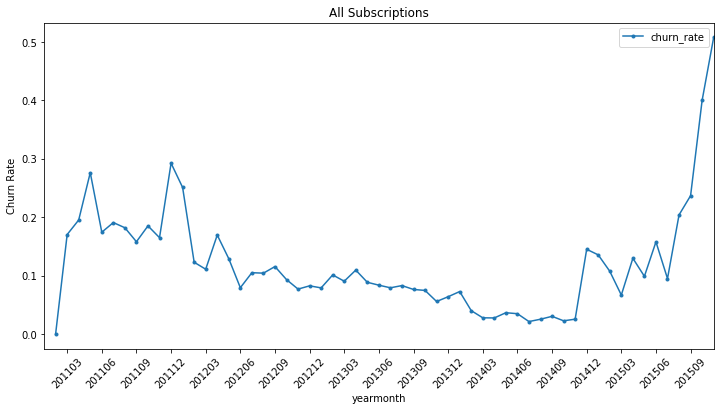

In [6]:
churn_all, yearmonths_all = calc_monthly_churn('all')
plot_churn_rate(churn_all, yearmonths_all, 'All',filtered_dates=False)
churn_all.head()

Function `extract_relevant_months` will return a DataFrame with churn rates for only March 2011 to December 2014, for the respective subscription type (both monthly and annual, only monthly, or only annual)


In [7]:
# Plot churn rate over time for only January 2011 to December 2014
def extract_relevant_months(churn, type_of_sub):
    churn['yearmonth'] = churn['yearmonth'].astype(int)
    filtered_churn = churn.loc[churn['yearmonth']>=201101].loc[churn['yearmonth']<=201411]
    filtered_churn['yearmonth'] = filtered_churn['yearmonth'].astype(str)
    filtered_yearmonths = list(filtered_churn['yearmonth'])
    return filtered_churn, filtered_yearmonths


Plot churn rate over time for only January 2011 to December 2014

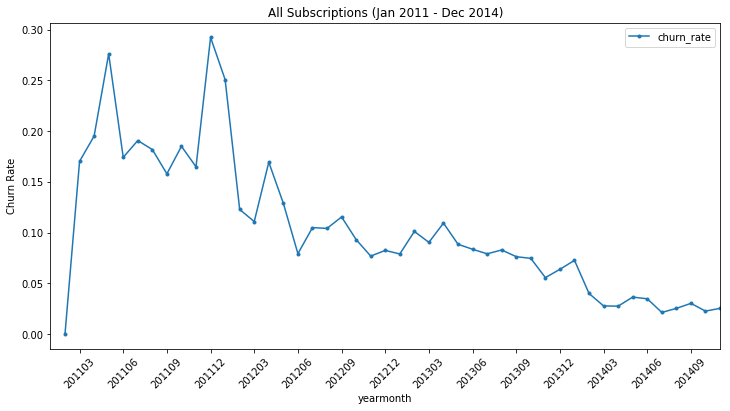

In [8]:
filtered_churn, filtered_yearmonths = extract_relevant_months(churn_all, 'All')
plot_churn_rate(filtered_churn, filtered_yearmonths, 'All',filtered_dates=True)



------
## INVESTIGATING CHURN 

Above, we created a graph that looks like this:



![churn_plot](https://dq-content.s3.amazonaws.com/468/churn_plot.png)



You may have noticed a few things:

- The churn rate is very erratic at the beginning;
- In the months prior to you taking over the business in January of 2013, the churn rate started to become more stable.
- After you took over the business, there was a spike in churn. This is not surprising, maybe people just took the opportunity to change gyms or quit.
- At the end of 2013 and beginning of 2014, there was a relatively large spike in the churn rate.

It had been almost one year since you had taken over the business, so you naturally decide to investigate what could have led to this spike.

Due to your domain knowledge and intuition, you suspect that drilling down into the behavior of the churn rate by type of suscription (monthly vs. annual) may give you some clues. You repeat the analysis for each of these segments. Here are the graphs you obtained:

,yearmonth,total_churned,total_customers,churn_rate
0,201101,0.0,0,NaN
1,201102,0.0,15,0.000000
2,201103,8.0,42,0.190476
3,201104,16.0,68,0.235294
4,201105,29.0,87,0.333333


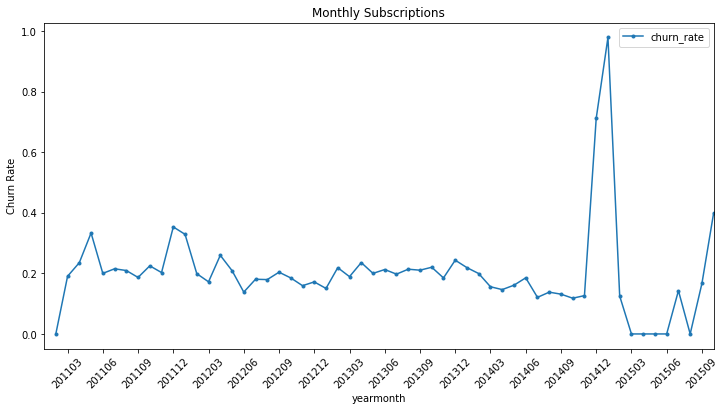

In [9]:
churn_monthly, yearmonths_monthly = calc_monthly_churn('monthly')
plot_churn_rate(churn_monthly, yearmonths_monthly, 'monthly',filtered_dates=False)
churn_monthly.head()

,yearmonth,total_churned,total_customers,churn_rate
0,201101,0.0,0,NaN
1,201102,0.0,2,0.0
2,201103,0.0,5,0.0
3,201104,0.0,14,0.0
4,201105,0.0,18,0.0


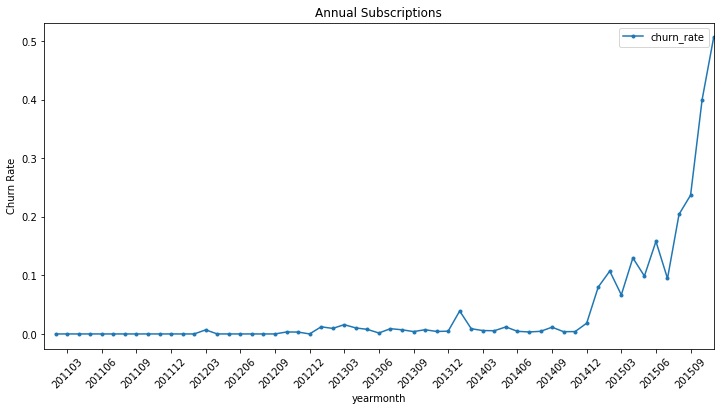

In [10]:
churn_annual, yearmonths_annual = calc_monthly_churn('annual')
plot_churn_rate(churn_annual, yearmonths_annual, 'annual',filtered_dates=False)
churn_annual.head()

Plot churn rate over time for only January 2011 to December 2014 for monthly subscriptions only


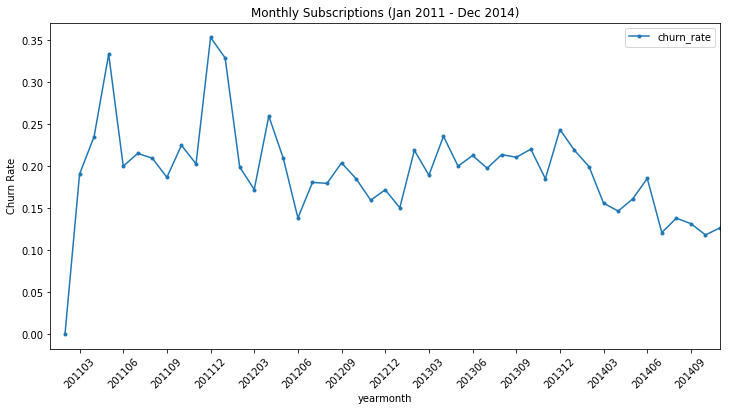

In [11]:
filtered_churn, filtered_yearmonths = extract_relevant_months(churn_monthly, 'monthly')
plot_churn_rate(filtered_churn, filtered_yearmonths, 'monthly',filtered_dates=True)

Plot churn rate over time for only January 2011 to December 2014 for annual subscriptions only


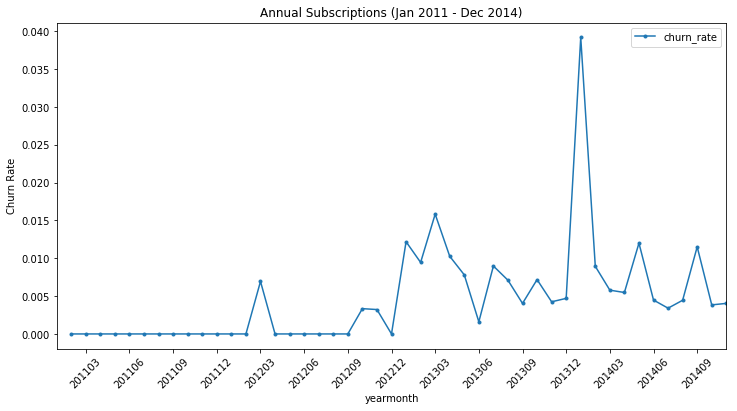

In [12]:
filtered_churn, filtered_yearmonths = extract_relevant_months(churn_annual, 'annual')
plot_churn_rate(filtered_churn, filtered_yearmonths, 'annual',filtered_dates=True)

It seems the spike in churn originates from the monthly plans in December and from the annual plans in January.

![churn_monthly](https://dq-content.s3.amazonaws.com/468/churn_monthly.png)





![churn_annual](https://dq-content.s3.amazonaws.com/468/churn_annual.png)

Looking at the annual graph you immediately remember that when you took over the business in January of 2013, you made a promo where people could sign up for a year for \\$500. What you're seeing here is the churn due to that promotion. Maybe people don't want to pay \\$50 per month, or maybe they had already quit a few months prior.

A few actions that you could take to reactivate these customers are:
- Make a new promotion specifically for the quitters.
- Make a new promotion specifically for the customers who attended the gym up until the end.
- Throw in some perks in addition to the standard service for the customers who didn't quit.

As for the monthly plan churned customers, you think back to recent changes in the service to try to figure out why they quit. Nothing comes to mind, you have no idea.

You decide to reach out to these customers and offer them a one-day pass for the gym in exchange for their feedback. Hopefully you can get some insights and act on them.

Overall, you've been doing a good job of keeping your customers. In addition to being a fit creative genius, you also are an entrepreneur — life isn't fair.

------
## ANALYZING CHURN 

Notice how we finished the last screen with possible actions: churn rate is actionable. Moreover, it satisfies most, if not all, of the other requirements for what makes a good metric:

- Accurate
- Simple and intelligible
- Easy to drill down into
- Actionable
- Dynamic
- Standardized
- Business oriented

It should come as no surprise that retaining your customers is important. Let's bring some clarity into this by specifying some reasons why reducing churn is important:

- The more customers you lose, the smaller the pool of potential customers becomes. Depending on the industry and kind of business, you can even run the risk of completely exhausting the pool of potential customers.
  - In the scenario we just saw, the potential pool of customers are the people that live sufficiently close to the gym. If you lose all of them, you're going to have a hard time getting customers.
- In the case of subscription based products, current customers are more likely to buy the more expensive products than new customers.
- Churn rate informs how happy customers are with your product.
- Research has shown that retaining existing customers is more profitable than acquiring new customers due primarily to savings on acquisition costs, the higher volume of service consumption, and customer referrals ([source](https://journals.lib.unb.ca/index.php/JCIM/article/view/442)).
- Happy customers provide free advertising.

Gauging churn rates, just like NPS, is also industry-dependent:



[![churn_by_industry](https://dq-content.s3.amazonaws.com/468/churn_by_industry.png)](https://www.statista.com/statistics/816735/customer-churn-rate-by-industry-us/)